In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DS1_C5_S2_EmployeeAttrition_Data_Practice.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


# Task 1
Perform bivariate and multivariate analysis on categorical columns with the help of graphs/charts, as mentioned below:
• Analyze the business travel category-wise employee attrition using a count plot.
• Analyze the education field-wise employee attrition using a bar chart.
• Analyze the department-wise employee attrition using a bar chart.
• Analyze the environment satisfaction score-wise employee attrition using a bar chart.
• Use the 'Gender' column to display gender-wise employee attrition using a count plot.
• Use the 'MaritalStatus' column to display the marital status-wise employee attrition using a count plot.
• Use the 'OverTime' column to display the overtime category-wise employee attrition using a pie chart.
• Use the 'PerformanceRating' column to display the performance rating-wise employee attrition using a count plot.
• Use the 'JobSatisfaction' column to display the job satisfaction category-wise employee attrition using a count plot.


In [3]:
#separate data into categorial and numerical 

In [67]:
def sep_data(df):
    categorial = []
    continuous = []
    for i in df.columns:
        if df[i].nunique() < 20:
            categorial.append(i)
        else:
            continuous.append(i)
    return categorial, continuous

categorial, continuous = sep_data(df)

from tabulate import tabulate
table = [categorial, continuous]
print(tabulate({"categorial":categorial, "continuous":continuous}, headers=["categorial", "continuous"]))



categorial                continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            DistanceFromHome
Department                EmployeeNumber
EducationField            HourlyRate
EnvironmentSatisfaction   MonthlyIncome
Gender                    TotalWorkingYears
JobInvolvement            YearsAtCompany
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [5]:
#BusinessTravel

In [6]:
def cat_cat(col1, col2):
    fig, ax=plt.subplots(figsize=(15,10))
    sns.countplot(x=df[col1], hue=df[col2], data=df)
    plt.show

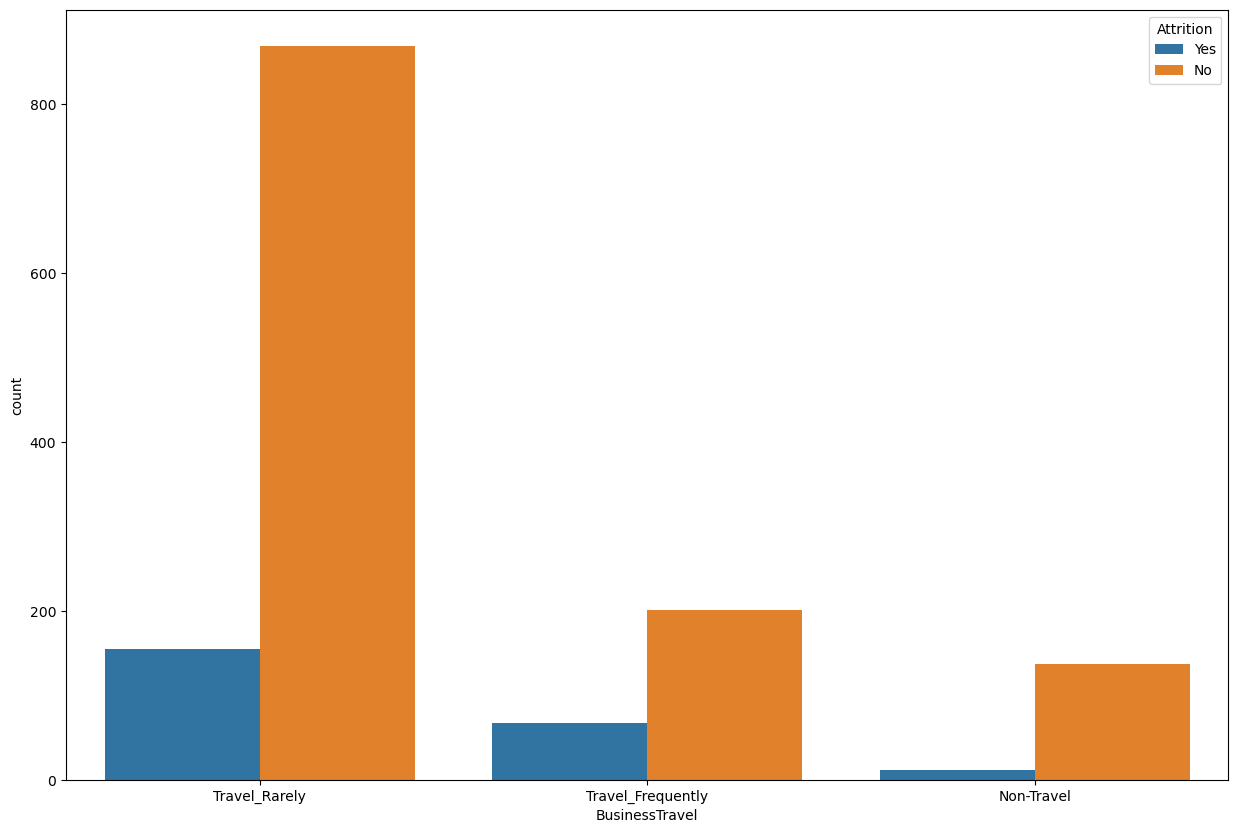

In [7]:
cat_cat("BusinessTravel","Attrition")

# Interpretation: 
- There are more employees who rarely travel 
- The Attrition is "NO" for these employees

# Analyze the education field-wise employee attrition using a bar chart.

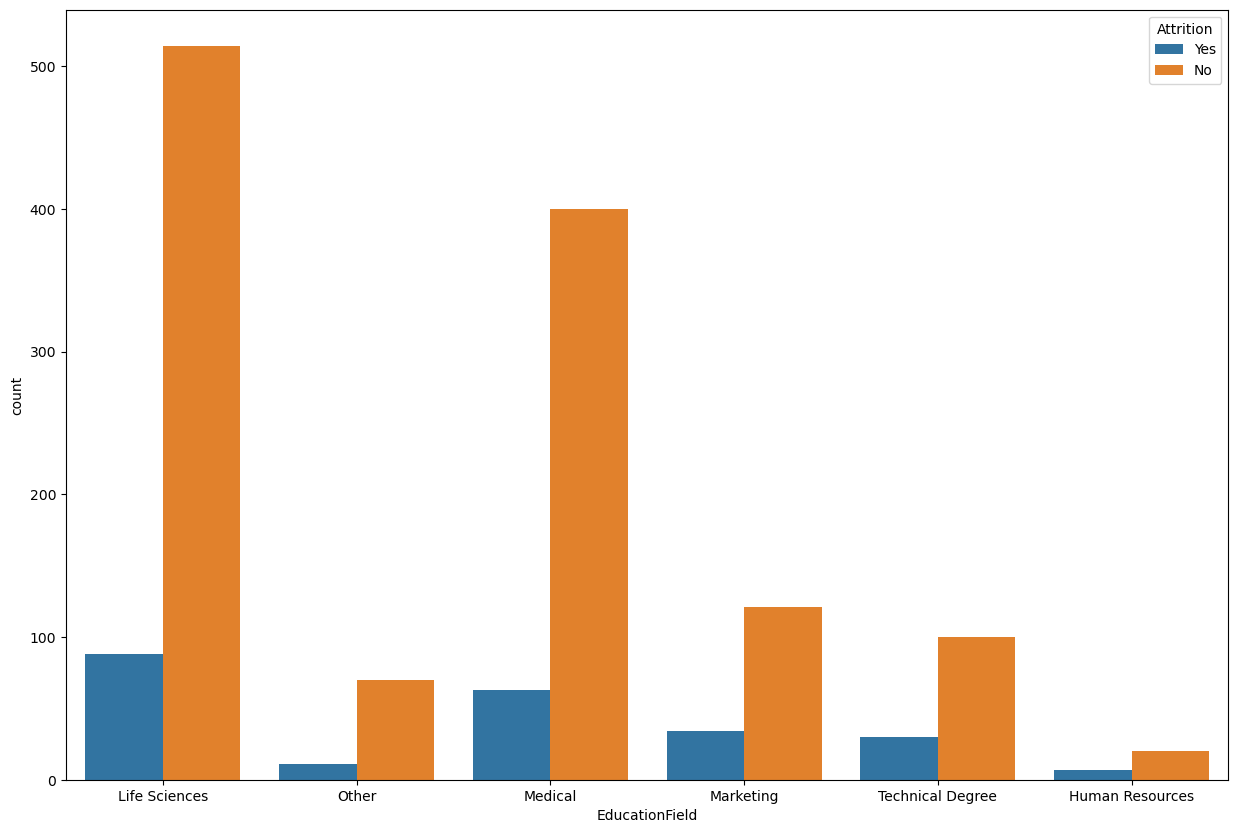

In [8]:
cat_cat("EducationField","Attrition")

# Interpretation: 
-  there are more employees in Life Sciences and Medical as compared to other education fields and The Attrition is "No" for the employees whose EducationField is Life Sciences 

# Analyze the department-wise employee attrition using a bar chart.

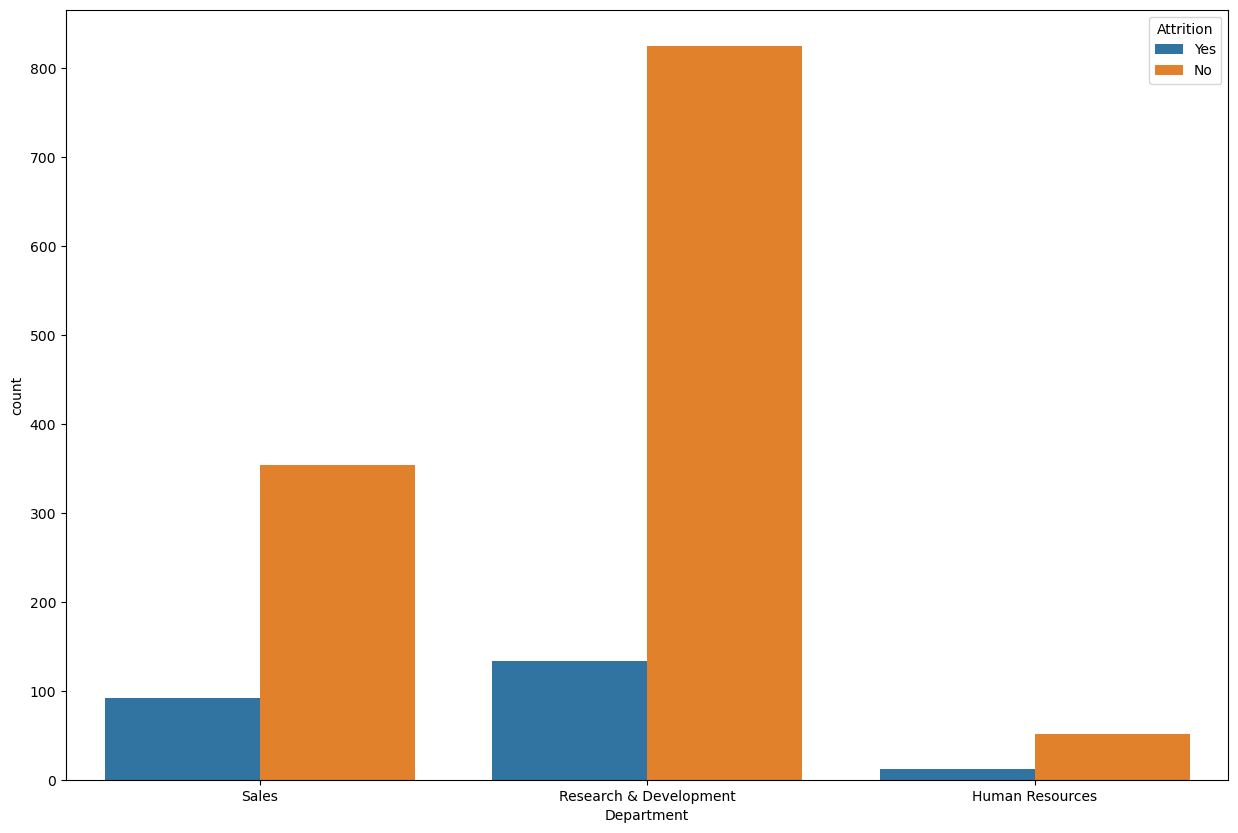

In [9]:
cat_cat("Department","Attrition")

# interpretation:
- The Research & development department has 800 epmloyees with attrition of "No" as compared to other departments

# Analyze the environment satisfaction score-wise employee attrition using a bar chart.

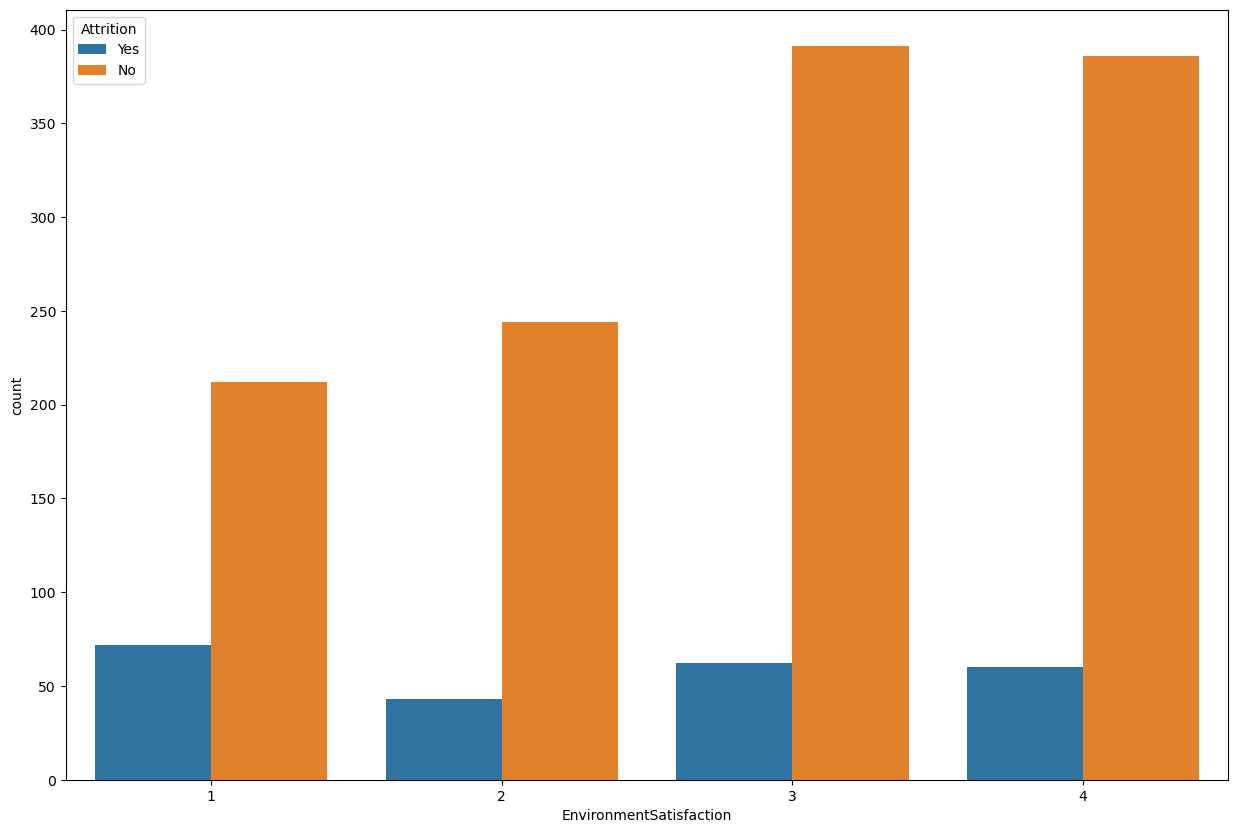

In [10]:
cat_cat("EnvironmentSatisfaction","Attrition")

# interpretation:
- EnvironmentSatisfaction with score 3 and 4 has the highest Attrition of "No"

# Use the 'Gender' column to display gender-wise employee attrition using a count plot.

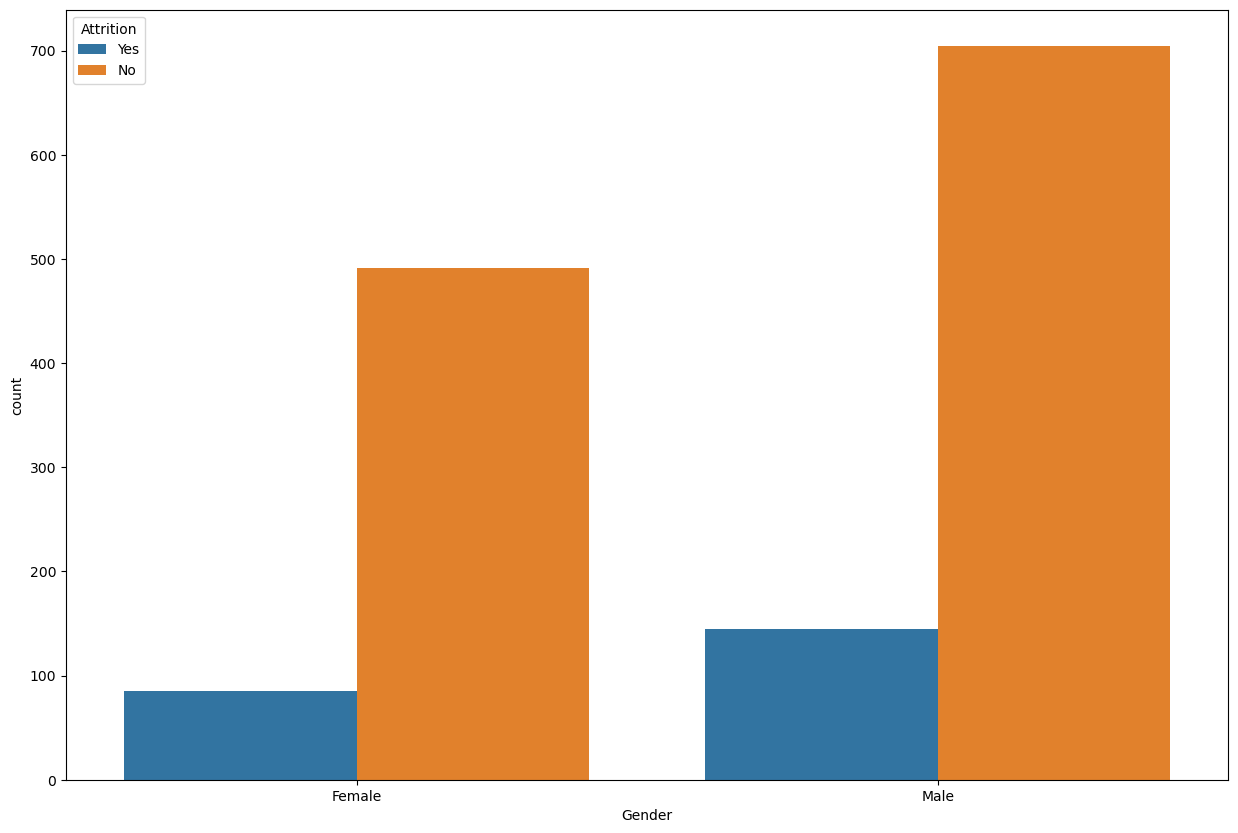

In [11]:
cat_cat("Gender","Attrition")

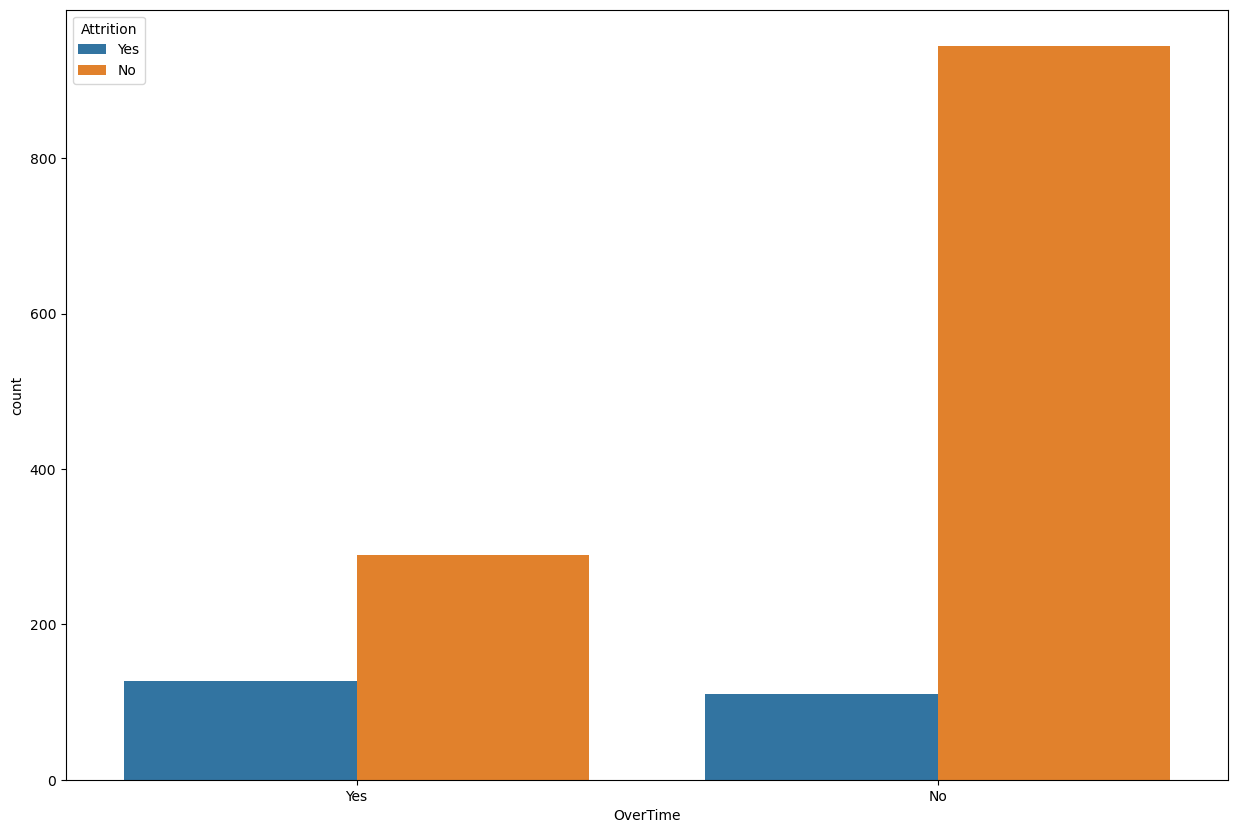

In [24]:
cat_cat("OverTime","Attrition")

# interpretation
- Male has the highest attrition score of "NO" as compared to female

# Use the 'MaritalStatus' column to display the marital status-wise employee attrition using a count plot

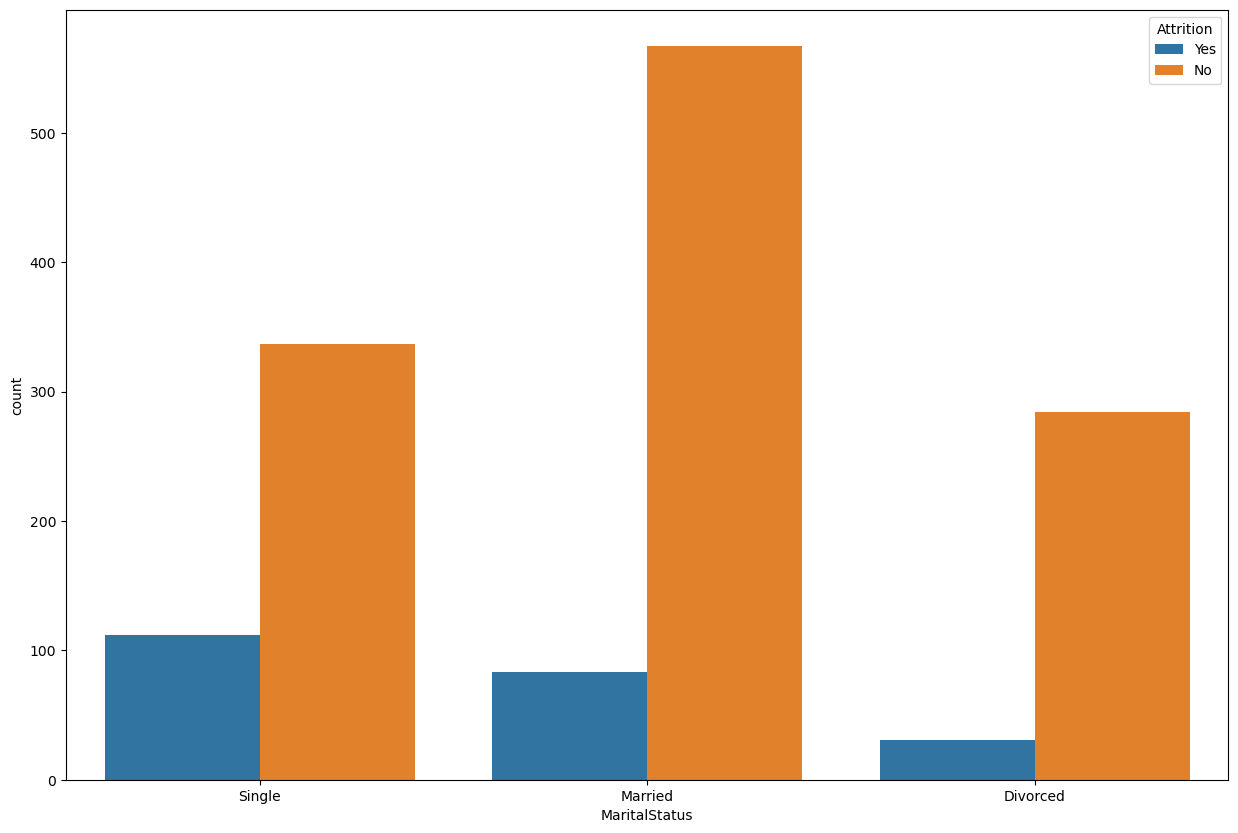

In [12]:
cat_cat("MaritalStatus","Attrition")

# interpretation 
- The employees whose MaritalStatus is married has the highest attrition of "No" as compared to single and divorced

# Use the 'OverTime' column to display the overtime category-wise employee attrition using a pie chart.

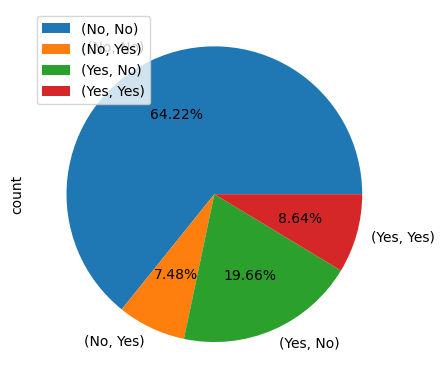

In [30]:
z= df.groupby(by=["OverTime"])["Attrition"].value_counts()
z.plot(kind="pie", autopct="%0.2f%%");
plt.legend()
plt.show()

# interpretation
- The employees has high attrition of "No" who is not working overtime

# Use the 'PerformanceRating' column to display the performance rating-wise employee attrition using a count plot.

In [ ]:
cat_cat("PerformanceRating","Attrition")

# interpretation 
- Employees whose performance rating is 3 has high attrition of  "No"

# Use the 'JobSatisfaction' column to display the job satisfaction category-wise employee attrition using a count plot.

In [ ]:
cat_cat("JobSatisfaction","Attrition")

# interpretation:
- The employees with 3 and 4 jobsatisfaction has more attrition of "NO" as compared to 1 and 2

# Task 2
Perform the bi-variate analysis between categorical and numerical variables using an appropriate graph/chart.
- Use the 'Age' column to display age group-wise distribution of the employee attrition using a histogram and a box plot.
- Use the 'HourlyRate' column to display the hourly salary-wise employee attrition using a histogram and a box plot.
- Use the 'MonthlyIncome' column to display the monthly salary-wise employee attrition using a histogram and a box plot.
-  Use the 'DistanceFromHome' column to display the employee attrition by distance from home (in kilometers) using a histogram    and a box plot.
- Use the 'TotalWorkingYears' column to display the tenure-wise employee attrition using a histogram and a box plot

In [59]:
def cat_num_analysis(cat, num):
    x=df.groupby(cat)[num].mean()
    fig, ax=plt.subplots(1,2, figsize=(15,8))
    sns.histplot(x= df[num], hue=df[cat] ,ax=ax[0])
    sns.boxplot(y= df[num], x=df[cat],ax=ax[1])
    plt.show()

# Age and Attrition

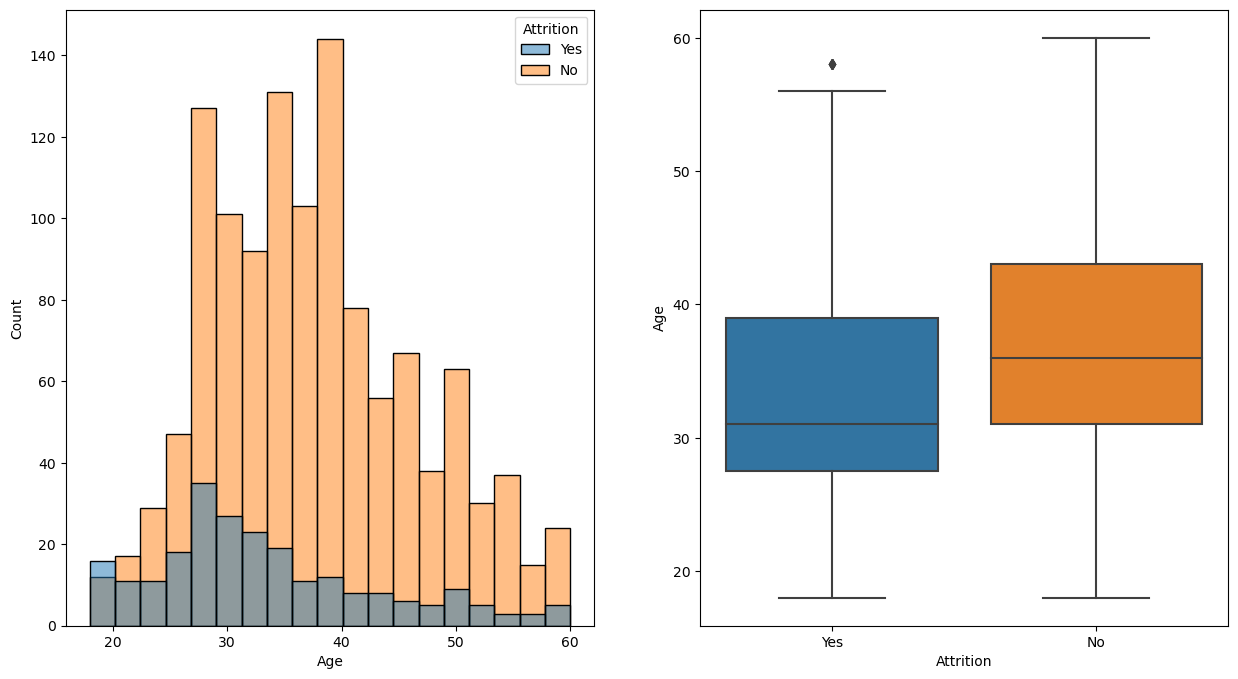

In [60]:
cat_num_analysis("Attrition","Age")

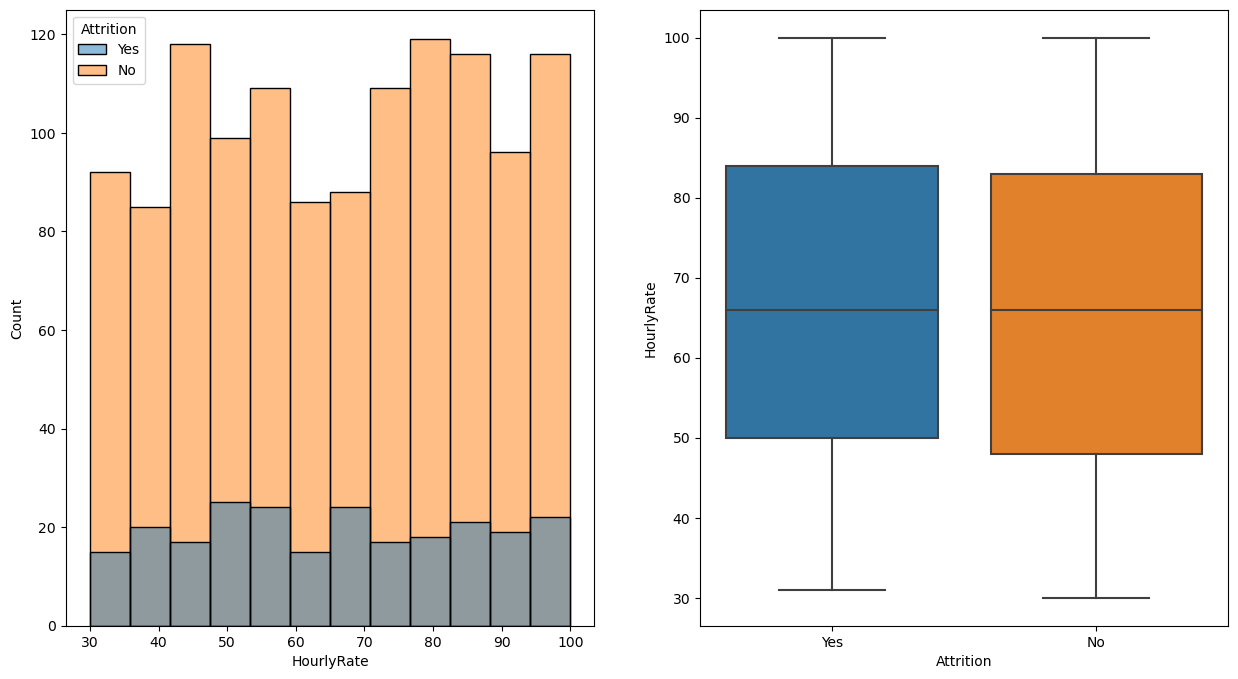

In [62]:
cat_num_analysis("Attrition","HourlyRate")

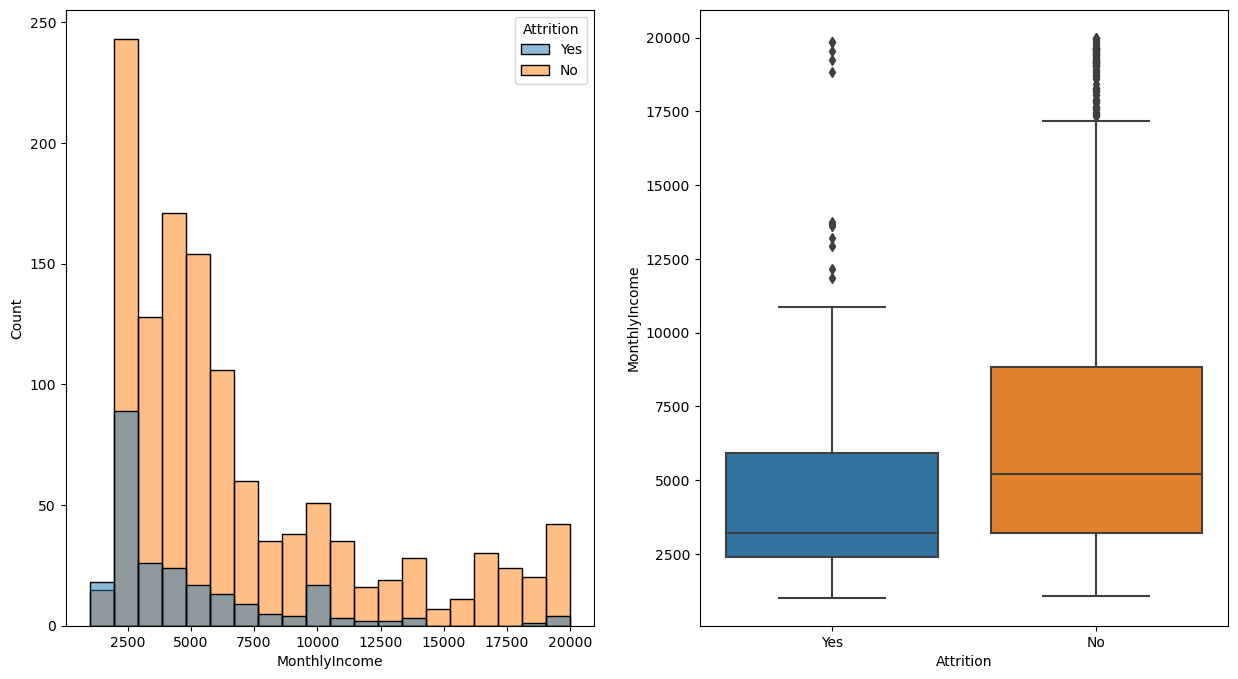

In [63]:
cat_num_analysis("Attrition","MonthlyIncome")

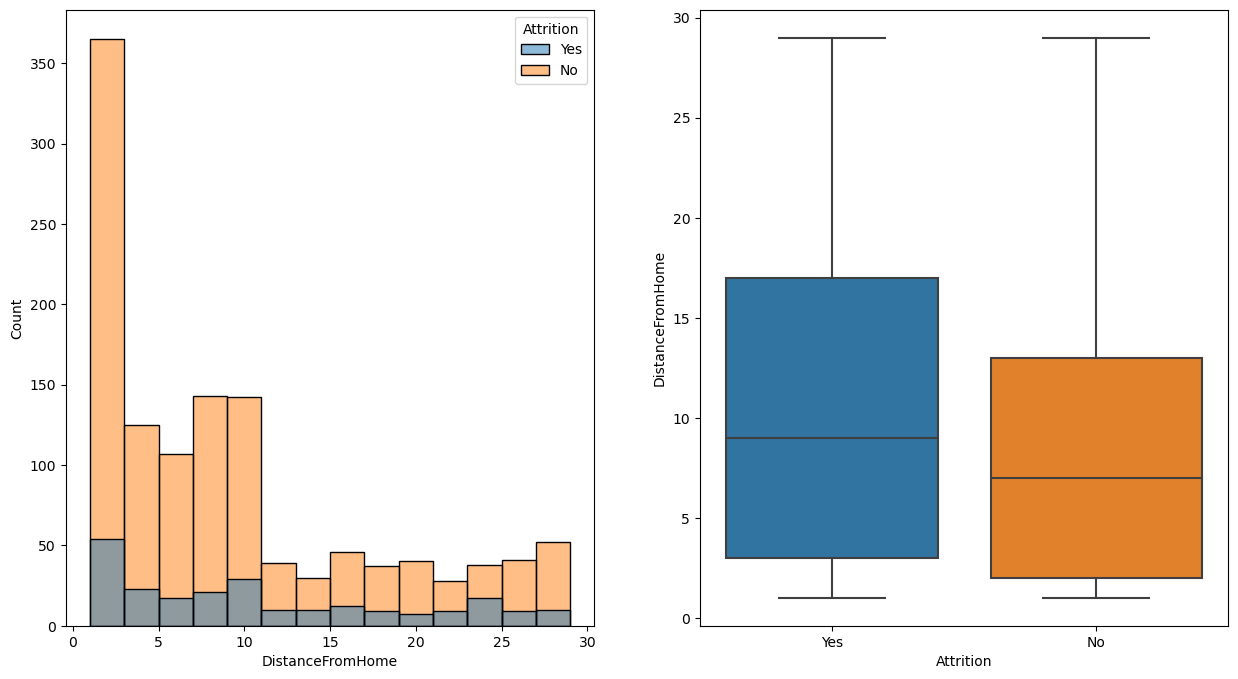

In [68]:
cat_num_analysis("Attrition","DistanceFromHome")

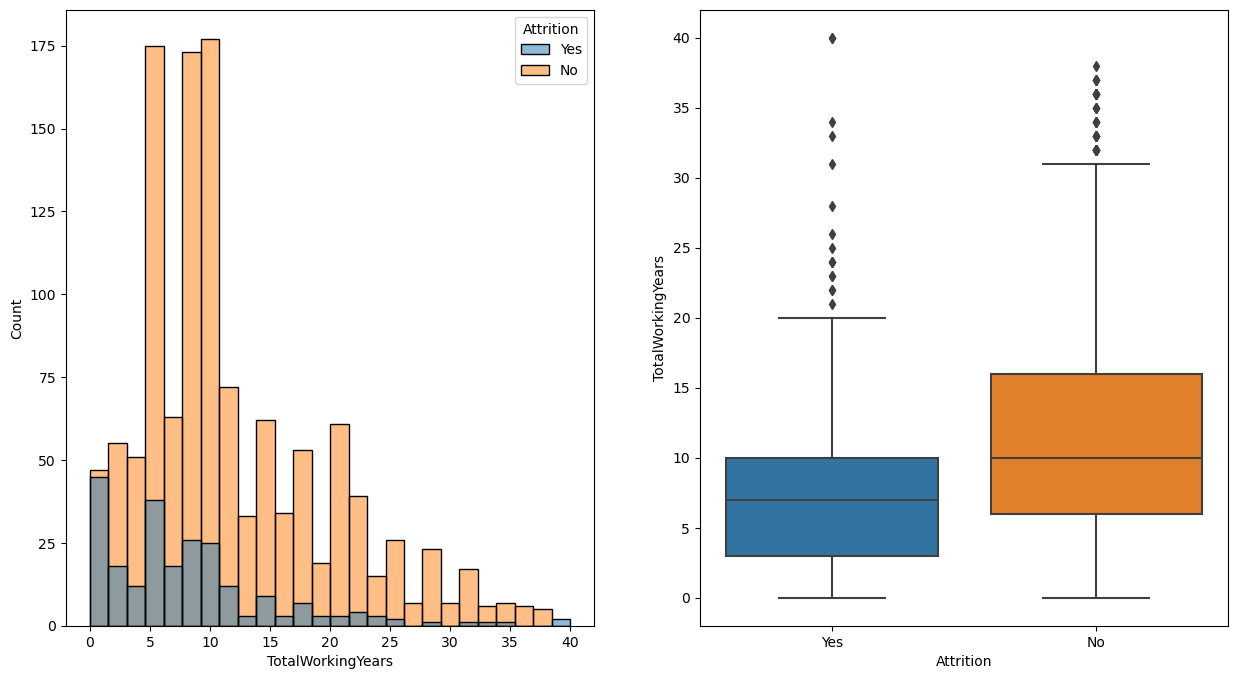

In [69]:
cat_num_analysis("Attrition","TotalWorkingYears")

# Task 3
Visualize the job role-wise count of the attrited employees who were travelling rarely, using a horizontal bar chart.

In [87]:
travel = df[(df["BusinessTravel"]=="Travel_Rarely")]
travel

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
6,59.0,No,Travel_Rarely,Research & Development,3,Medical,10,3,Female,81,...,Yes,4,1,12,3,2,1,0,0,0
7,30.0,No,Travel_Rarely,Research & Development,24,Life Sciences,11,4,Male,67,...,No,4,2,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,39.0,No,Travel_Rarely,Sales,24,NaN,2056,2,Female,60,...,No,3,1,21,2,2,20,9,9,6
1464,26.0,No,Travel_Rarely,Sales,5,Other,2060,4,Female,30,...,No,3,4,5,2,3,4,2,0,0
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3


<Axes: ylabel='JobRole,Attrition'>

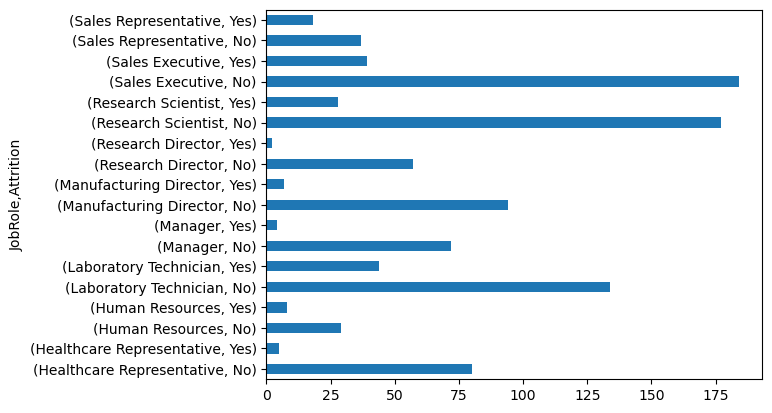

In [91]:
a = travel.groupby(by=["JobRole"])["Attrition"].value_counts()
a.plot(kind="barh")


# Task 4
Visualize the job role-wise employee attrition from the Life Sciences and Medical education background using a horizontal bar chart.

In [72]:
b = df[(df["EducationField"]=="Life Sciences") | (df["EducationField"]=="Medical")]
b

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
5,32.0,No,Travel_Frequently,Research & Development,2,Life Sciences,8,4,Male,79,...,No,3,3,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [112]:
y=b.groupby(by=["JobRole"])["Attrition"].value_counts()
y

JobRole                    Attrition
Healthcare Representative  No            99
                           Yes            7
Human Resources            No            21
                           Yes            3
Laboratory Technician      No           167
                           Yes           50
Manager                    No            68
                           Yes            3
Manufacturing Director     No           114
                           Yes            9
Research Director          No            69
                           Yes            1
Research Scientist         No           198
                           Yes           35
Sales Executive            No           141
                           Yes           29
Sales Representative       No            30
                           Yes           14
Name: count, dtype: int64

<Axes: ylabel='JobRole,Attrition'>

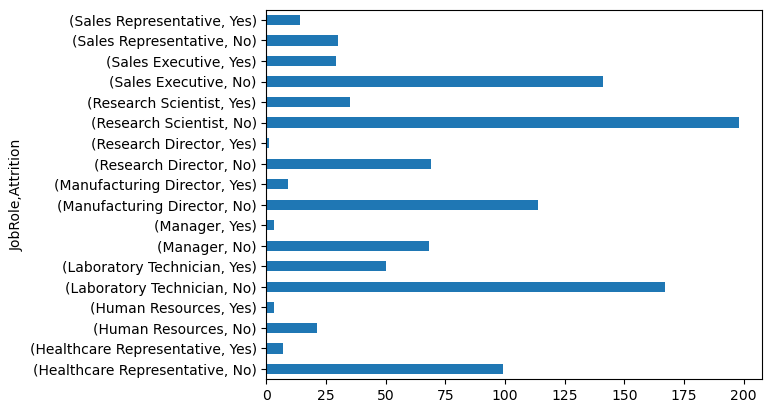

In [82]:
y.plot(kind="barh")

Task 5
Visualize the gender-wise employee attrition from the sales department using a count plot.

In [93]:
dept =  df[(df["Department"]=="Sales")]
dept

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
18,53.0,No,Travel_Rarely,Sales,2,Life Sciences,23,1,Female,78,...,No,3,3,31,3,3,25,8,3,7
21,36.0,Yes,Travel_Rarely,Sales,9,Life Sciences,27,3,Male,82,...,No,4,2,10,4,3,5,3,0,3
27,42.0,No,Travel_Rarely,Sales,8,Marketing,35,3,Male,48,...,No,3,4,10,2,3,9,7,4,2
29,46.0,No,Travel_Rarely,Sales,2,Marketing,38,2,Female,83,...,No,3,4,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45.0,No,Travel_Rarely,Sales,20,Life Sciences,2046,4,Female,50,...,No,3,3,8,3,3,5,3,0,1
1461,50.0,Yes,Travel_Rarely,Sales,28,Marketing,2055,4,Male,39,...,Yes,3,2,20,3,3,3,2,2,0
1462,39.0,No,Travel_Rarely,Sales,24,NaN,2056,2,Female,60,...,No,3,1,21,2,2,20,9,9,6
1464,26.0,No,Travel_Rarely,Sales,5,Other,2060,4,Female,30,...,No,3,4,5,2,3,4,2,0,0


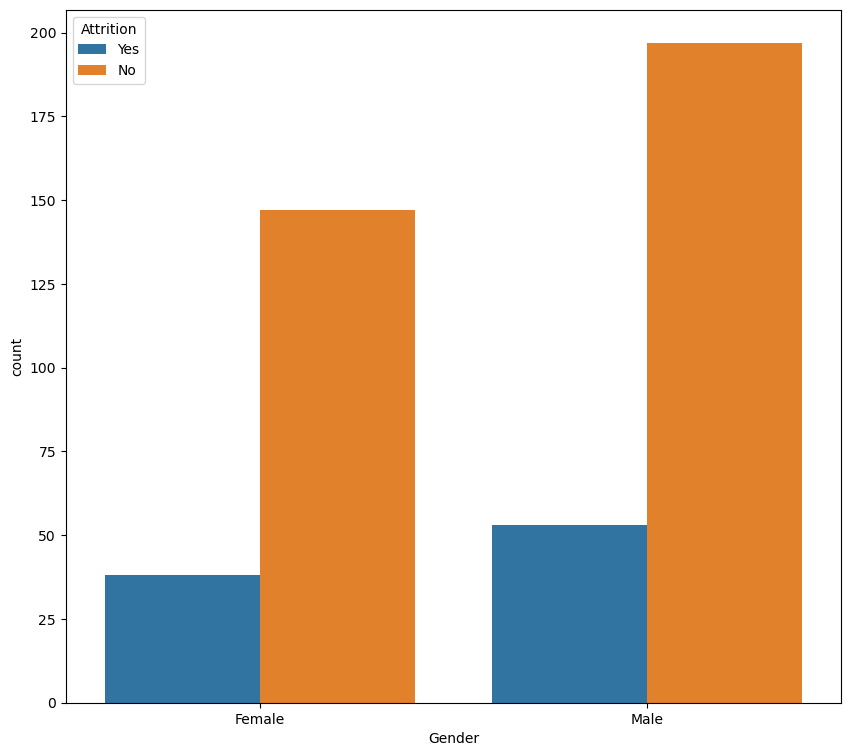

In [111]:
fig, ax=plt.subplots(figsize=(10,9))
sns.countplot(x="Gender", hue="Attrition", data=dept)
plt.show()